In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
import tqdm
import os

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline
from pipeline_streamers import infall_sphere 


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:45<00:00, 105.70it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:32<00:00, 150.41it/s]


Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4855/4855 [00:00<00:00, 12206.98it/s]


Disk size: 95.5 au


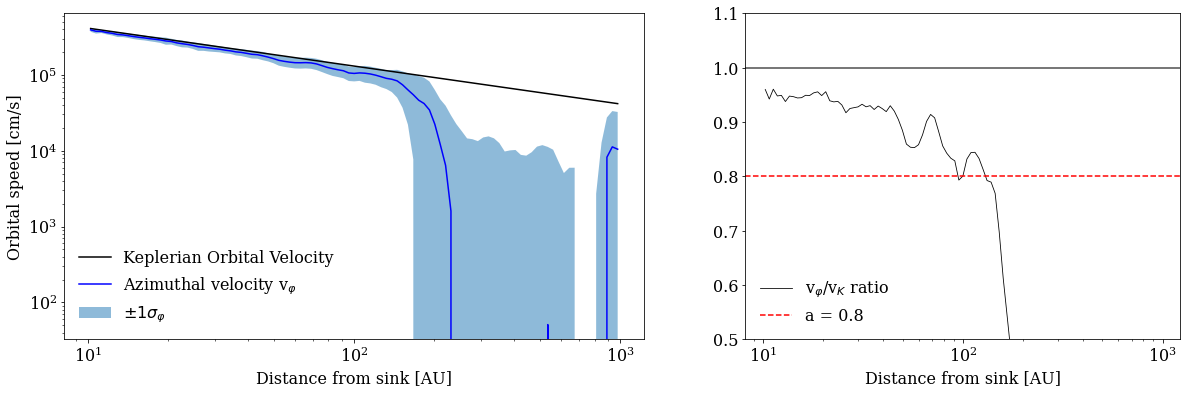

In [2]:
datai = pipeline(snap = 404, run = 'sink178core03', sink_id=178)
data = pipeline(snap = 511, run = 'sink178core03', sink_id=178)
first_snap = 404
last_snap = 511


data.recalc_L(verbose = 1); 
data.calc_disksize()

In [3]:
step = (last_snap - first_snap) / 3 
print(step)
snapshots = np.arange(first_snap, last_snap + 1, step).astype(int); 
snapshots

35.666666666666664


array([404, 439, 475, 511])

In [4]:
hammer_data50 = {}
snap_time = np.zeros_like(snapshots)
for i, sh in tqdm.tqdm(enumerate(snapshots)):

    data = pipeline(snap = sh, run = 'sink178core03', sink_id=178, loading_bar = False, verbose = 0)
    data.calc_L(verbose = 0); data.calc_cyl(); data.calc_trans_xyz(verbose = 0)
    hammer_data50[sh] = data.infall_sphere(shell_r=50, get_data=True, plot = False, verbose = 0)
    snap_time[i] = data.time - datai.time

0it [00:00, ?it/s]

4it [04:02, 60.68s/it]


In [5]:
range_plot = 1e-9; linear_threshold = 1e-13;
fig, axs = plt.subplots(2,2, figsize = (20,20), subplot_kw={'projection': 'hammer'})

for i, sn in zip(range(len(snapshots)), hammer_data50):

    lon, lat, proj_data, total_infall = hammer_data50[sn]
    print(i)
    Lon , Lat = np.meshgrid(lon, lat, indexing = 'ij')
    ax = axs.flatten()[i]
    ax.set_yticks([]); ax.set_xticks([])
    im = ax.pcolormesh(lon, lat, proj_data, cmap='coolwarm', snap = True, norm=colors.SymLogNorm(linthresh = linear_threshold, linscale = 0.5, vmin = -range_plot, vmax = range_plot), shading = 'gouraud')
    ax.set_title(f'T = {snap_time[i]/1e3:1.2f} kyr, Total infall: {total_infall*1e6:2.1f} 10$^{{-6}}$ M$_\odot$/yr')

   
fig.subplots_adjust(wspace=0, hspace=0.5)
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), fraction = 0.1, pad = -0.38, location = 'bottom')
cbar.set_label('Mass accretion per area [M$_\odot$au$^{-2}$yr$^{-1}$]', labelpad = -70, rotation = 0, fontsize = 20)
plt.tight_layout()
#plt.savefig(f'graphics/hammer_timeevolution', facecolor='w', dpi = 500)

0


In [ ]:
hammer_data1000 = {}
snap_time = np.zeros_like(snapshots)
for i, sh in tqdm.tqdm(enumerate(snapshots)):
    data = pipeline(snap = sh, run = 'sink178core03', sink_id=178, loading_bar = False, verbose = 0)
    data.calc_L(verbose = 0); data.calc_cyl(); data.calc_trans_xyz(verbose = 0)
    hammer_data1000[sh] = data.infall_sphere(shell_r=1000, get_data=True, plot = False, verbose = 0)
    snap_time[i] = data.time - datai.time

0it [00:00, ?it/s]


NameError: name 'blockPrint' is not defined

/tmp/ipykernel_208180/2397774122.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


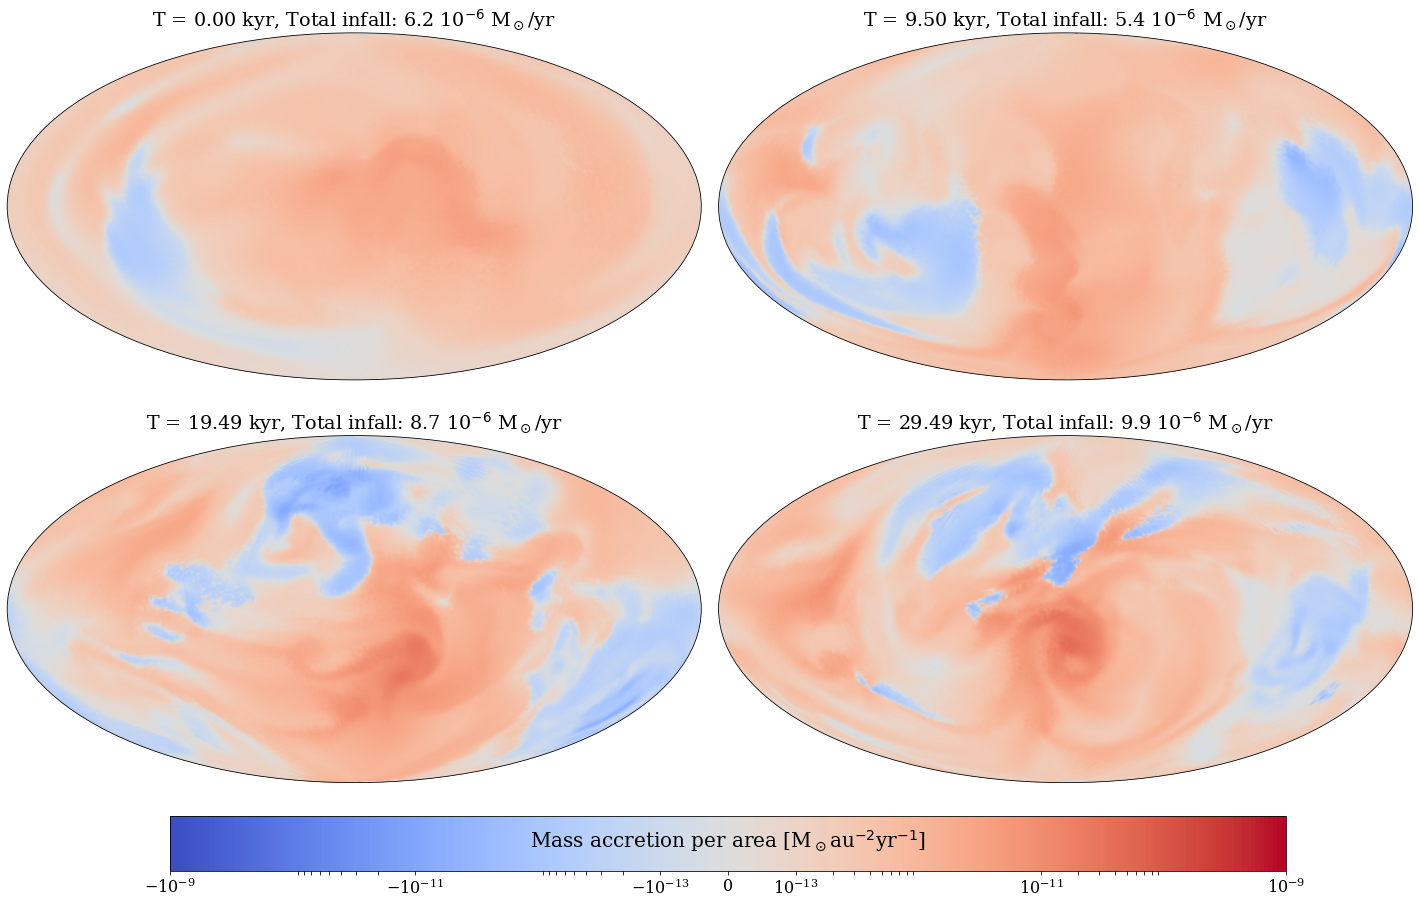

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (20,20), subplot_kw={'projection': 'hammer'})

for i, sn in zip(range(len(snapshots)), hammer_data1000):

    lon,lat, proj_data, total_infall = hammer_data1000[sn]
    Lon , Lat = np.meshgrid(lon,lat, indexing = 'ij')
    ax = axs.flatten()[i]
    ax.set_yticks([]); ax.set_xticks([])
    im = ax.pcolormesh(Lon, Lat, proj_data, cmap='coolwarm', snap = True, norm=colors.SymLogNorm(linthresh = linear_threshold, linscale = 0.5, vmin = -range_plot, vmax = range_plot), shading = 'gouraud')
    ax.set_title(f'T = {snap_time[i]/1e3:1.2f} kyr, Total infall: {total_infall*1e6:2.1f} 10$^{{-6}}$ M$_\odot$/yr')

   
fig.subplots_adjust(wspace=0, hspace=0.5)
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), fraction = 0.1, pad = -0.38, location = 'bottom')
cbar.set_label('Mass accretion per area [M$_\odot$au$^{-2}$yr$^{-1}$]', labelpad = -70, rotation = 0, fontsize = 20)

plt.tight_layout()
#plt.savefig(f'graphics/hammer_timeevolution', facecolor='w', dpi = 500)